<a href="https://colab.research.google.com/github/rogerdemori/PosTech_Data_Analytics/blob/main/tech_challenge_DTAT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [487]:
#Importando Bibliotecas

In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [489]:
#Lendo a Base de Dados

In [490]:
df = pd.read_csv('/content/tech-challenge-fiap_fase-2_ibovespa.csv', sep=',')
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,24.08.2023,117.026,118.135,118.136,116.848,"9,20M","-0,94%"
1,23.08.2023,118.135,116.160,118.135,116.159,"11,54M","1,70%"
2,22.08.2023,116.156,114.433,116.286,114.433,"9,83M","1,51%"
3,21.08.2023,114.429,115.404,115.425,114.067,"9,79M","-0,85%"
4,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
5,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
6,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
7,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
8,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
9,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"


In [491]:
#Obtendo informações sobre os Tipos de Dados.

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      3381 non-null   object 
 1   Último    3381 non-null   float64
 2   Abertura  3381 non-null   float64
 3   Máxima    3381 non-null   float64
 4   Mínima    3381 non-null   float64
 5   Vol.      3380 non-null   object 
 6   Var%      3381 non-null   object 
dtypes: float64(4), object(3)
memory usage: 185.0+ KB


In [493]:
#Tratando dados nulos

In [494]:
df.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [495]:
df[df['Vol.'].isna()]


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1872,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [496]:
df['Vol.'] = df['Vol.'].fillna(0)

In [497]:
#Transformando o tipo de dado em DateTime

In [498]:
df['Data'] = pd.to_datetime(df['Data'],format='%d.%m.%Y')
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-24,117.026,118.135,118.136,116.848,"9,20M","-0,94%"
1,2023-08-23,118.135,116.160,118.135,116.159,"11,54M","1,70%"
2,2023-08-22,116.156,114.433,116.286,114.433,"9,83M","1,51%"
3,2023-08-21,114.429,115.404,115.425,114.067,"9,79M","-0,85%"
4,2023-08-18,115.409,114.973,115.729,114.423,"10,60M","0,37%"
5,2023-08-17,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
6,2023-08-16,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
7,2023-08-15,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
8,2023-08-14,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
9,2023-08-11,118.065,118.350,119.054,117.415,"11,87M","-0,24%"


In [499]:
df['Último'] = df['Último'] * 1000
df['Último'] = df['Último'].astype(int)
df['Abertura'] = df['Abertura'] * 1000
df['Abertura'] = df['Abertura'].astype(int)
df['Máxima'] = df['Máxima'] * 1000
df['Máxima'] = df['Máxima'].astype(int)
df['Mínima'] = df['Mínima'] * 1000
df['Mínima'] = df['Mínima'].astype(int)
df['Vol.'] = df['Vol.'].str[:-1]
df['Var%'] = df['Var%'].str[:-1]
df['Vol.'] = df['Vol.'].str.replace(',','.')
df['Var%'] = df['Var%'].str.replace(',','.')
df['Vol.'] = df['Vol.'].astype(float)
df['Var%'] = df['Var%'].astype(float)
df['Vol.'] = df['Vol.'] * 1000000
df['Var%'] = df['Var%']/100
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-24,117026,118135,118136,116848,9200000.0,-0.0094
1,2023-08-23,118135,116160,118135,116159,11540000.0,0.0170
2,2023-08-22,116156,114433,116286,114433,9830000.0,0.0151
3,2023-08-21,114429,115404,115425,114067,9790000.0,-0.0085
4,2023-08-18,115409,114973,115729,114423,10600000.0,0.0037
5,2023-08-17,114982,115592,116610,114859,12750000.0,-0.0053
6,2023-08-16,115592,116171,117338,115534,18860000.0,-0.0050
7,2023-08-15,116171,116809,117697,116033,14640000.0,-0.0055
8,2023-08-14,116810,118067,118082,116530,11200000.0,-0.0106
9,2023-08-11,118065,118350,119054,117415,11870000.0,-0.0024


In [500]:
#Passando coluna Data como Index

In [501]:
df = df.set_index(['Data'])

df.head(10)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-08-24,117026,118135,118136,116848,9200000.0,-0.0094
2023-08-23,118135,116160,118135,116159,11540000.0,0.0170
2023-08-22,116156,114433,116286,114433,9830000.0,0.0151
2023-08-21,114429,115404,115425,114067,9790000.0,-0.0085
2023-08-18,115409,114973,115729,114423,10600000.0,0.0037
2023-08-17,114982,115592,116610,114859,12750000.0,-0.0053
2023-08-16,115592,116171,117338,115534,18860000.0,-0.0050
2023-08-15,116171,116809,117697,116033,14640000.0,-0.0055
2023-08-14,116810,118067,118082,116530,11200000.0,-0.0106


In [502]:
df = df.sort_index()

In [503]:
#Plot do Historico de Cotações Ibovespa

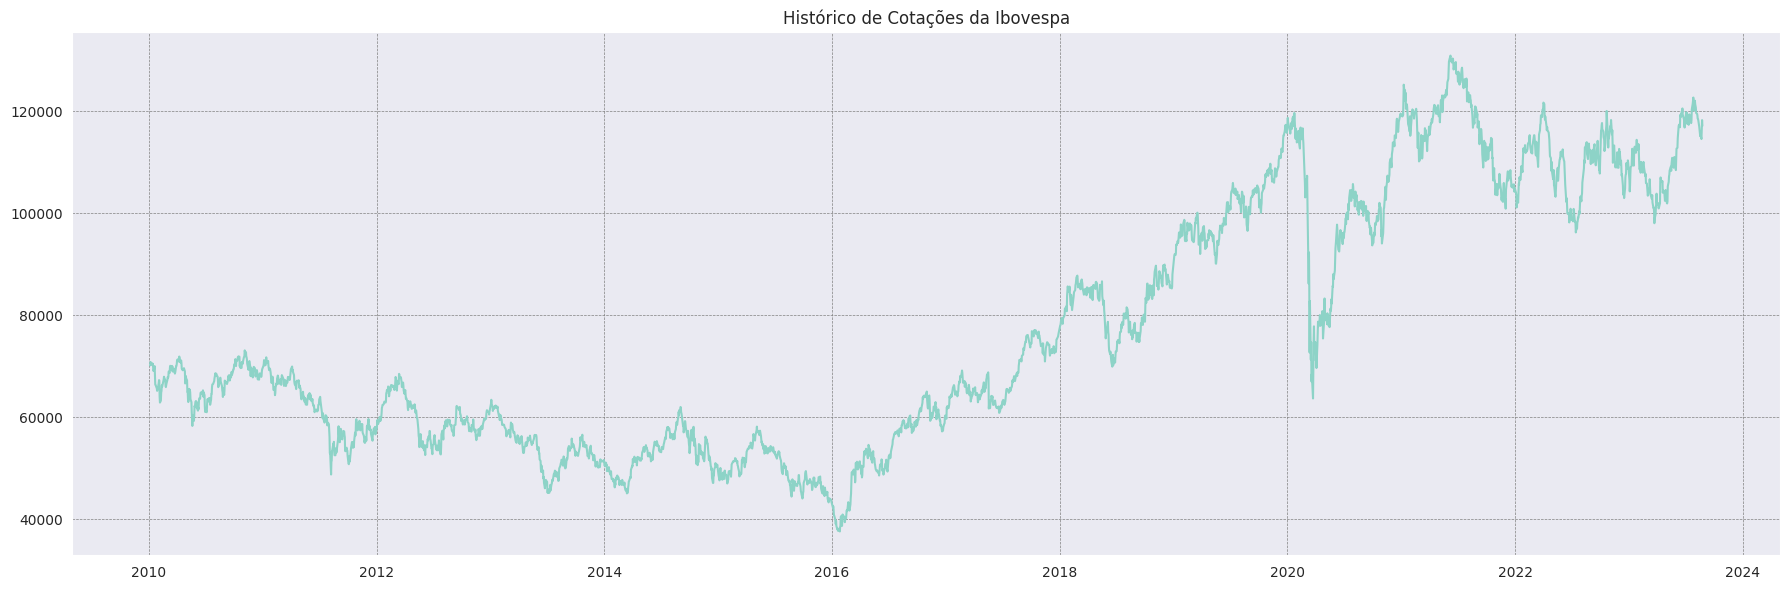

In [504]:
sns.set_style("darkgrid")
sns.set_palette("Set3")
plt.figure(figsize=(18,6))
plt.title('Histórico de Cotações da Ibovespa')
plt.plot(df['Último'])
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

In [505]:
#Criamos um Dataset apenas com as variaveis DS e Y

In [506]:
df_base = df[['Último']].astype(float)
df_base = df_base.sort_index()

df_base.head()

,Último
Data,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0


In [507]:
df_base.isnull().sum()

Último    0
dtype: int64

In [508]:
#Decomposição do grafico (Tendencia, Sazonalidade e Residuos)

In [509]:
resultados = seasonal_decompose(df_base, period=250)

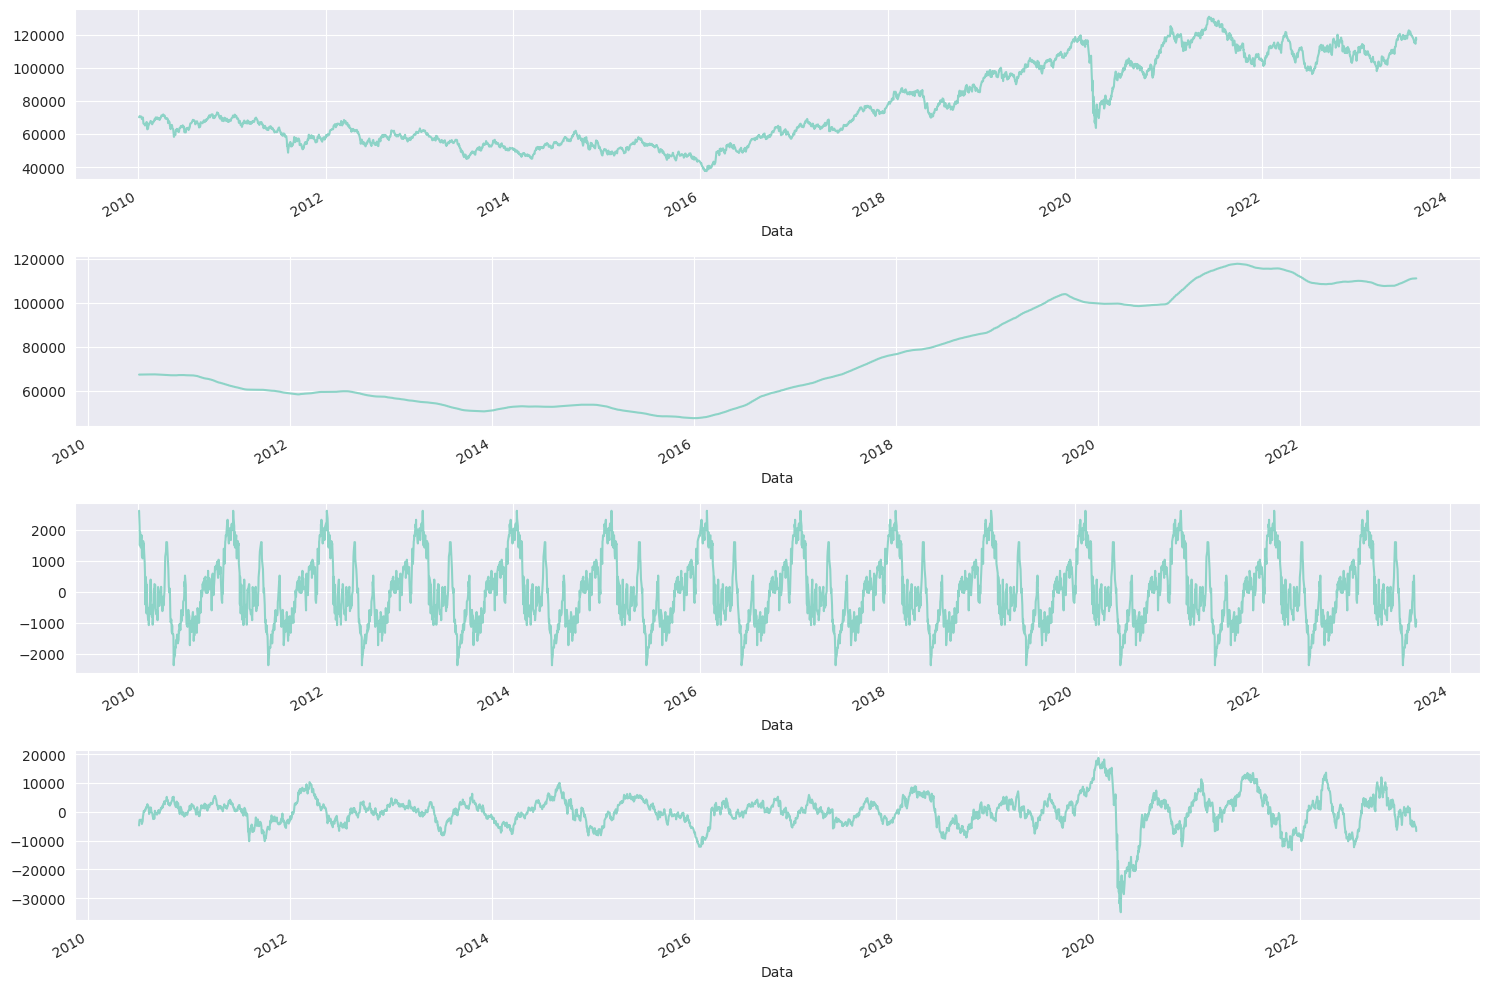

In [510]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [511]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3381 entries, 2010-01-04 to 2023-08-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Último  3381 non-null   float64
dtypes: float64(1)
memory usage: 52.8 KB


In [512]:
#Grafico KDE dos valores mais presentes

<ipython-input-513-2e8e6dc96e8f>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_base, shade=True)


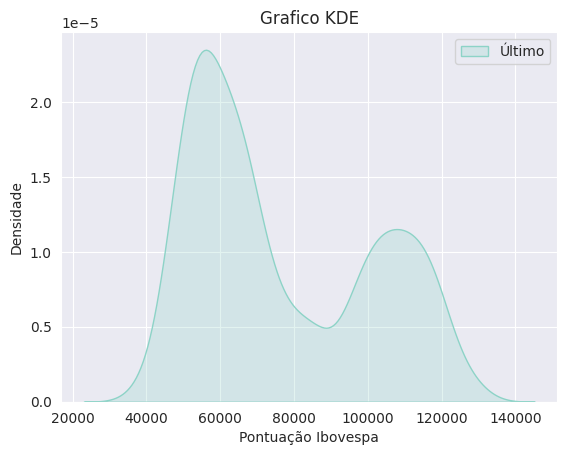

In [513]:
data = sns.load_dataset("iris")
# Criando um gráfico KDE
sns.kdeplot(data=df_base, shade=True)
plt.xlabel('Pontuação Ibovespa')
plt.ylabel('Densidade')
plt.title('Grafico KDE')
plt.show()

In [514]:
#Plot do logaritimo natural

In [515]:
df_log = np.log(df_base)

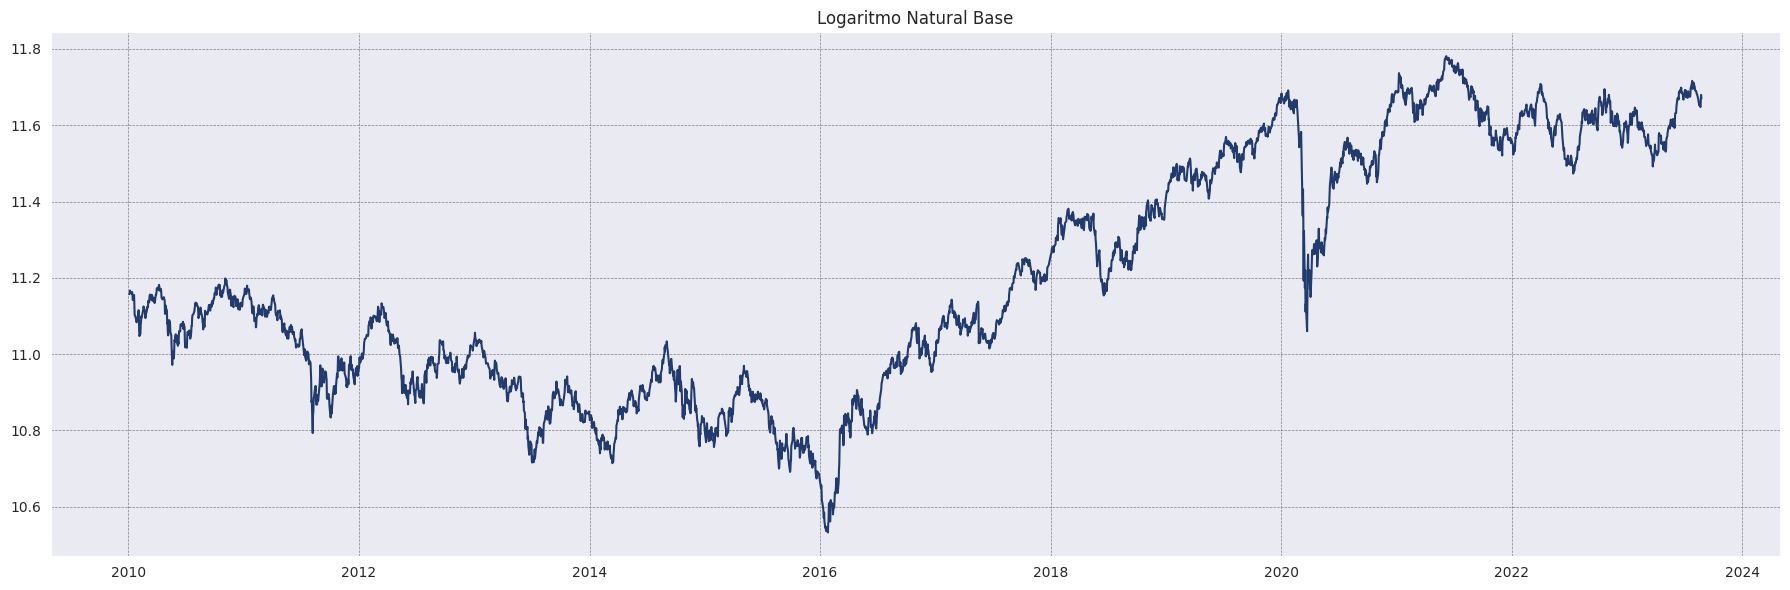

In [516]:
sns.set_style("dark")
sns.set_palette("cividis")
plt.figure(figsize=(18,6))
plt.title('Logaritmo Natural Base')
plt.plot(df_log)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

In [517]:
#Teste AD Fuller

In [518]:
from statsmodels.tsa.stattools import adfuller

In [519]:
X = df_base.values

In [520]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.1153653131068468
P-Value: 0.7089056613579996
Valores críticos:
	1%: -3.4322925020735493
	5%: -2.86239828444062
	10%: -2.567226881501505


In [521]:
#Janela deslizante dos dados (250 referente a media de dias uteisno ano)

In [522]:
rolling_mean = df_base.rolling(250).mean()
rolling_mean_log = df_log.rolling(250).mean()

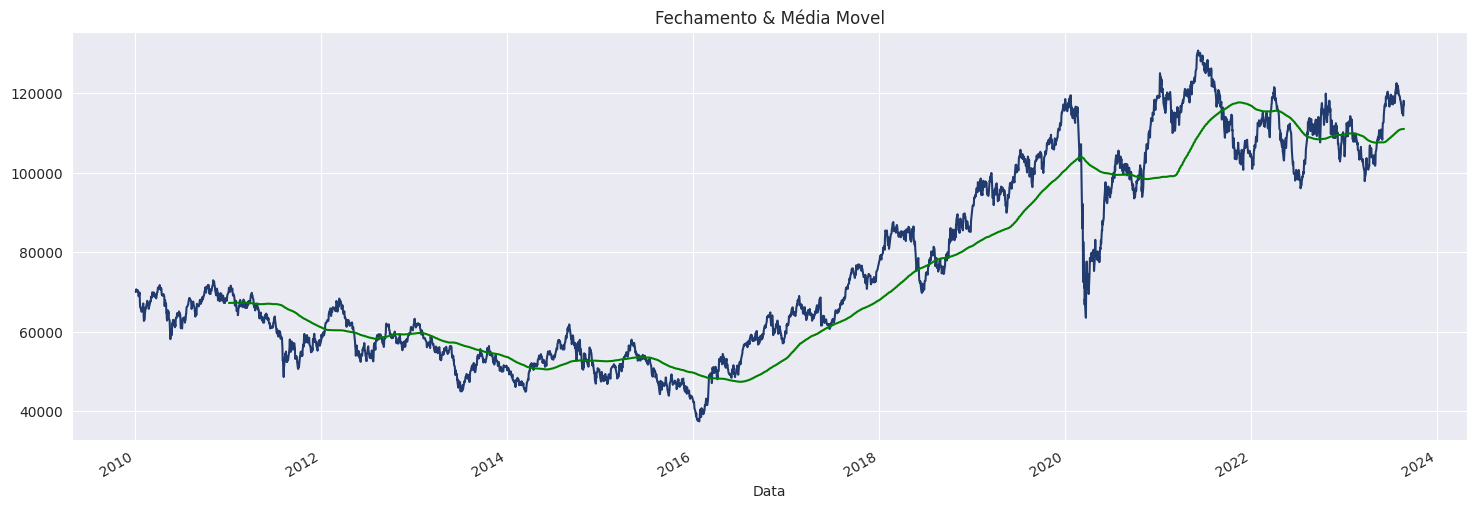

<Figure size 1000x600 with 0 Axes>

In [523]:
f, ax = plt.subplots(figsize=(18, 6))
df_base.plot(ax=ax, legend=False)
rolling_mean.plot(ax=ax, legend=False, color='g')
plt.title('Fechamento & Média Movel')
plt.grid(True)
plt.figure(figsize=(10,6))
plt.tight_layout()

In [524]:
rolling_std = df_base.rolling(250).std()
rolling_std_log =  df_log.rolling(250).std()

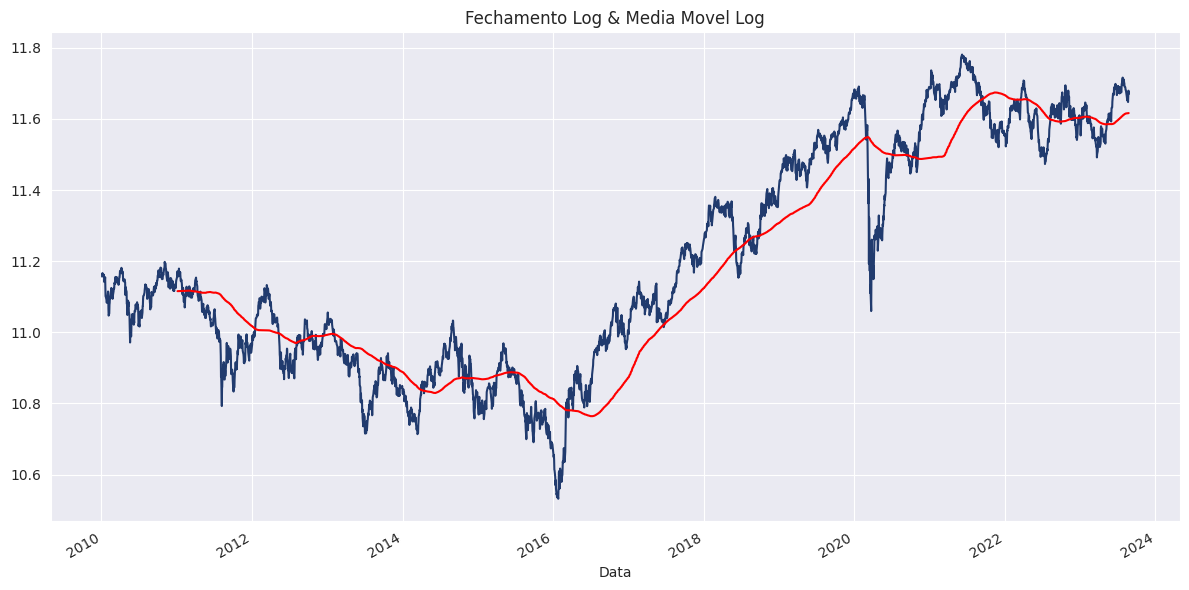

In [525]:
f, ax = plt.subplots(figsize=(12, 6))
df_log.plot(ax=ax, legend=False)
rolling_mean_log.plot(ax=ax, legend=False, color='r')
plt.grid(True)
plt.title('Fechamento Log & Media Movel Log')
plt.tight_layout()

In [526]:
#Grafico de media movel e desvio padrão

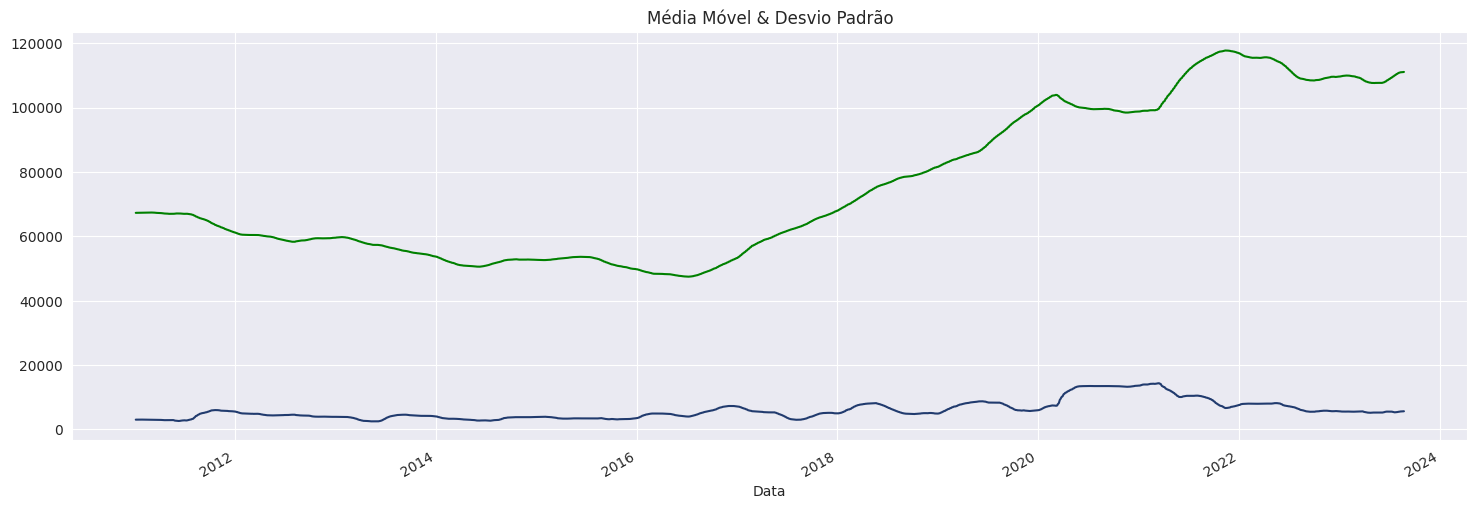

<Figure size 1000x600 with 0 Axes>

In [527]:
f, ax = plt.subplots(figsize=(18, 6))
rolling_std.plot(ax=ax, legend=False)
rolling_mean.plot(ax=ax, legend=False, color='g')
plt.title('Média Móvel & Desvio Padrão')
plt.grid(True)
plt.figure(figsize=(10,6))
plt.tight_layout()

In [528]:
#Plot do log da média movel e desvio padrão em janela deslizante

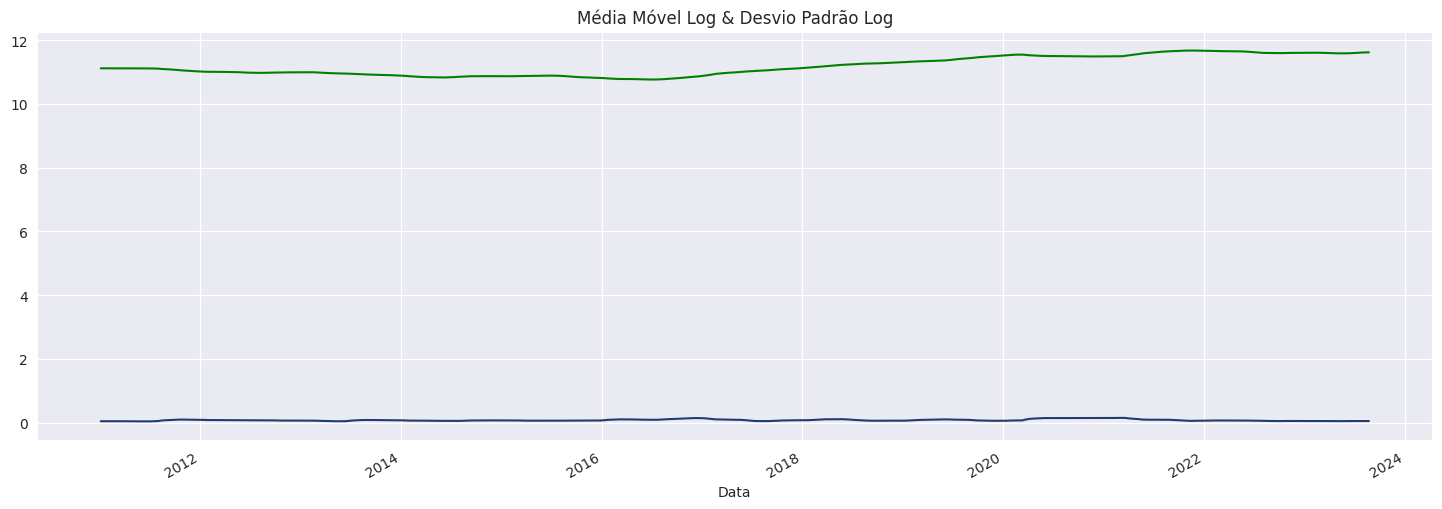

<Figure size 1000x600 with 0 Axes>

In [529]:
f, ax = plt.subplots(figsize=(18, 6))
rolling_std_log.plot(ax=ax, legend=False)
rolling_mean_log.plot(ax=ax, legend=False, color='g')
plt.title('Média Móvel Log & Desvio Padrão Log')
plt.grid(True)
plt.figure(figsize=(10,6))
plt.tight_layout()

In [530]:
#Aplicando a subtração da média móvel na base log

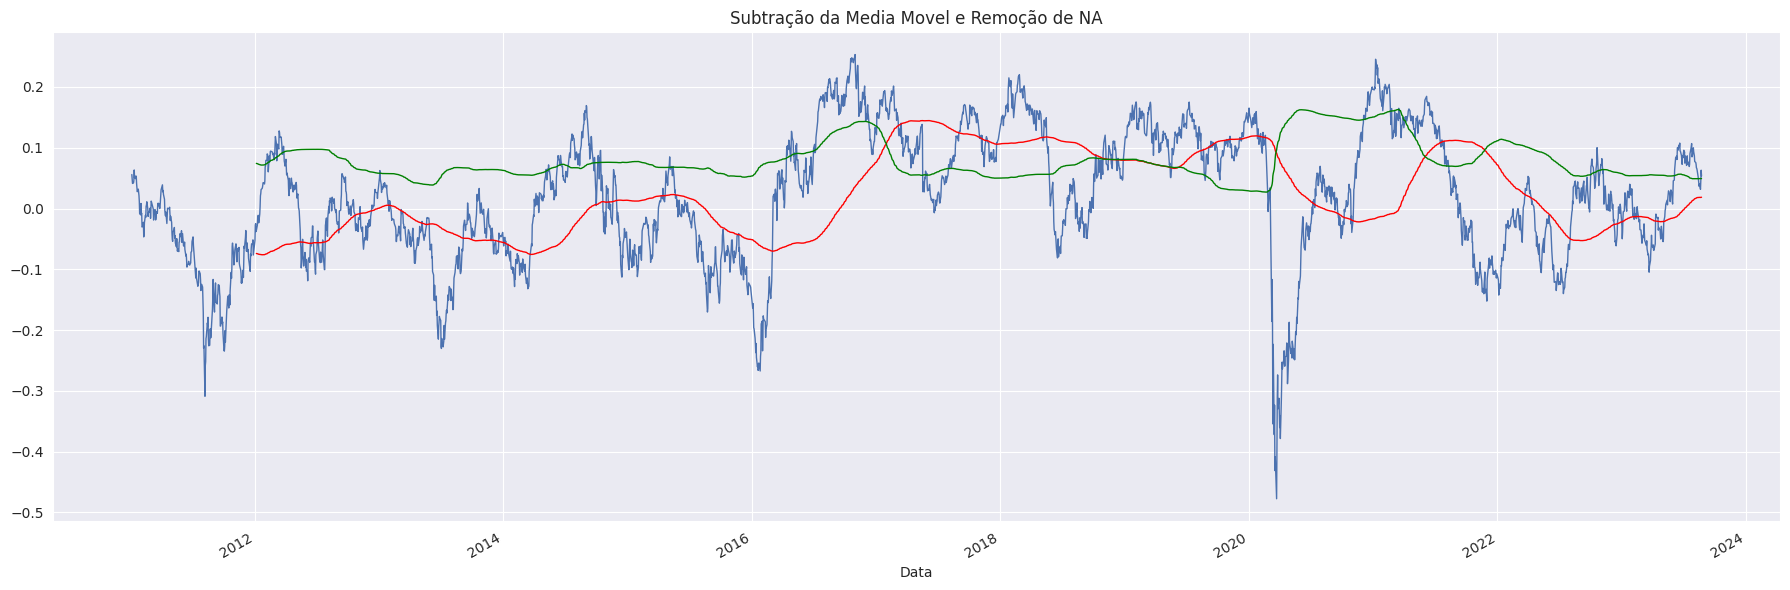

In [531]:
df_s = (df_log - rolling_mean_log).dropna()

ma_s = df_s.rolling(252).mean()

std = df_s.rolling(252).std()

sns.set_style('darkgrid')
sns.set_palette("deep")

f, ax = plt.subplots(figsize=(18,6))
df_s.plot(ax=ax, legend=False, linewidth=1)
ma_s.plot(ax=ax, legend=False, color='r', linewidth=1)
std.plot(ax=ax, legend=False, color='g', linewidth=1)
plt.title('Subtração da Media Movel e Remoção de NA')
plt.tight_layout()

In [532]:
#Filtrando a base para ordem ascendente da data

In [533]:
df_base = df_base.sort_index()
df_base

,Último
Data,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0
...,...
2023-08-18,115409.0
2023-08-21,114429.0
2023-08-22,116156.0


In [534]:
#Novo Teste ADF após operação de janela deslizante

In [535]:
X_s = df_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -4.4129383749458295
P-Value: 0.0002815675295374334
Valores críticos:
	1%: -3.432447656502639
	5%: -2.862466814475811
	10%: -2.567263365487344


In [536]:
#Novo Teste ADF após trazer a diferencial

Teste ADF
Teste Estatístico: -20.634801210841335
P-Value: 0.0
Valores críticos:
	1%: -3.4324449684310445
	5%: -2.8624656272139637
	10%: -2.5672627334083655


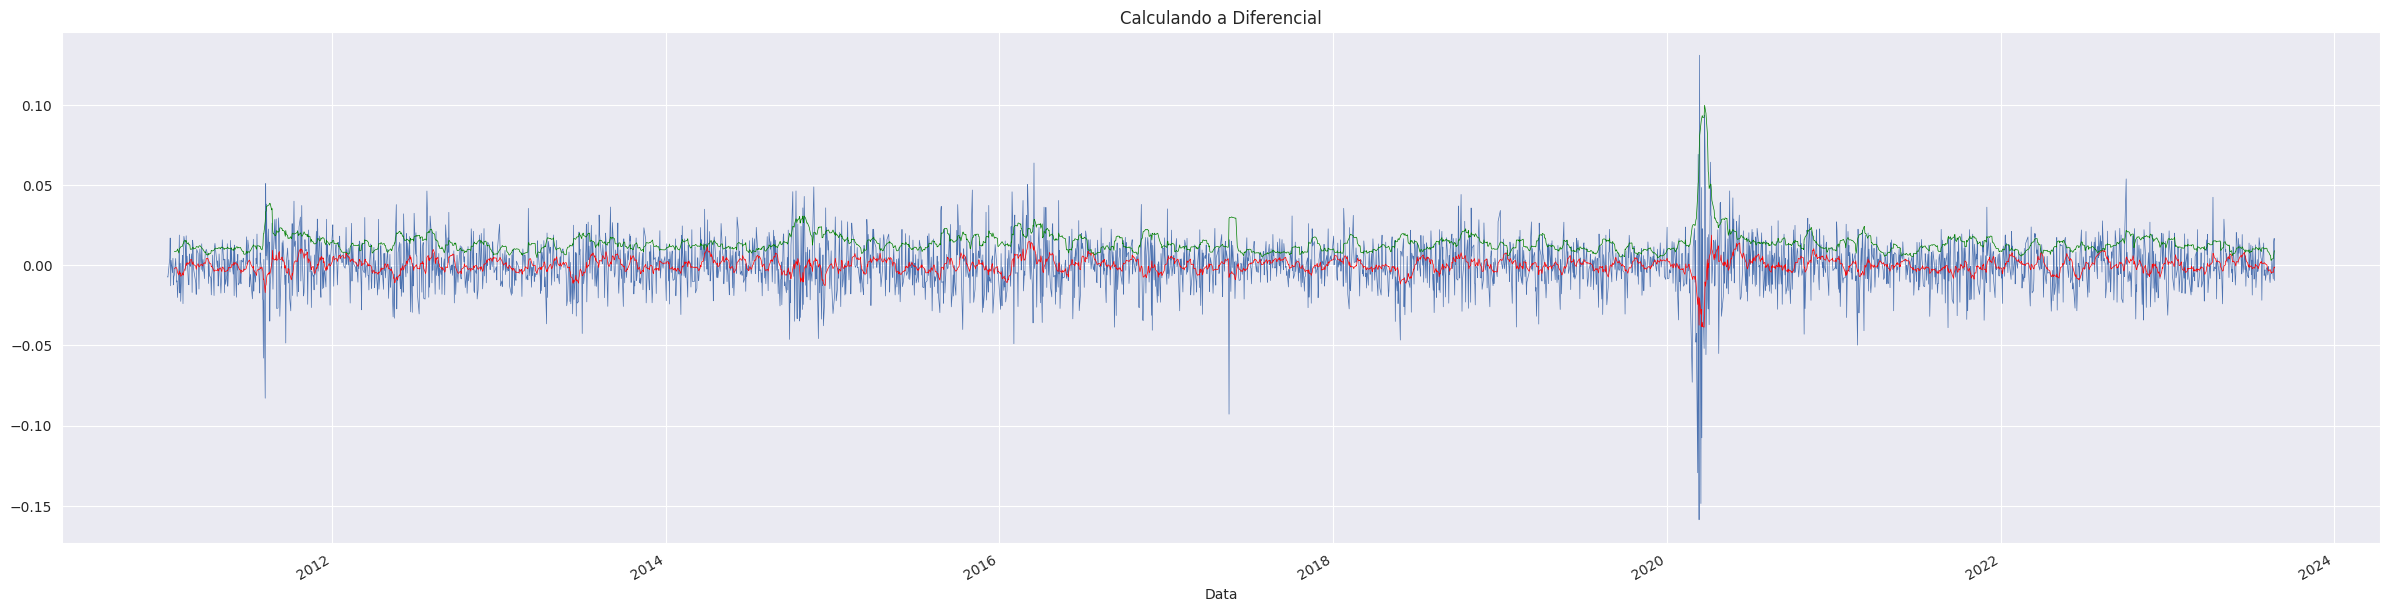

In [537]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

sns.set_style('darkgrid')
sns.set_palette("deep")
f, ax = plt.subplots(figsize=(24,6))
df_diff.plot(ax=ax, legend=False, linewidth=0.5)
ma_diff.plot(ax=ax, legend=False, color='r', linewidth=0.5)
std_diff.plot(ax=ax, legend=False, color='g', linewidth=0.5)
plt.grid(True)
plt.tight_layout()
plt.title('Calculando a Diferencial')

X_diff = df_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [538]:
#TRAIN & TEST

In [539]:
#Realizando os Treinos e Testes da base de dados e mostrando via grafico as escalas de 80% e 20%.
train = df.iloc[:int(.80*len(df)), :]
test = df.iloc[int(.80*len(df)):, :]


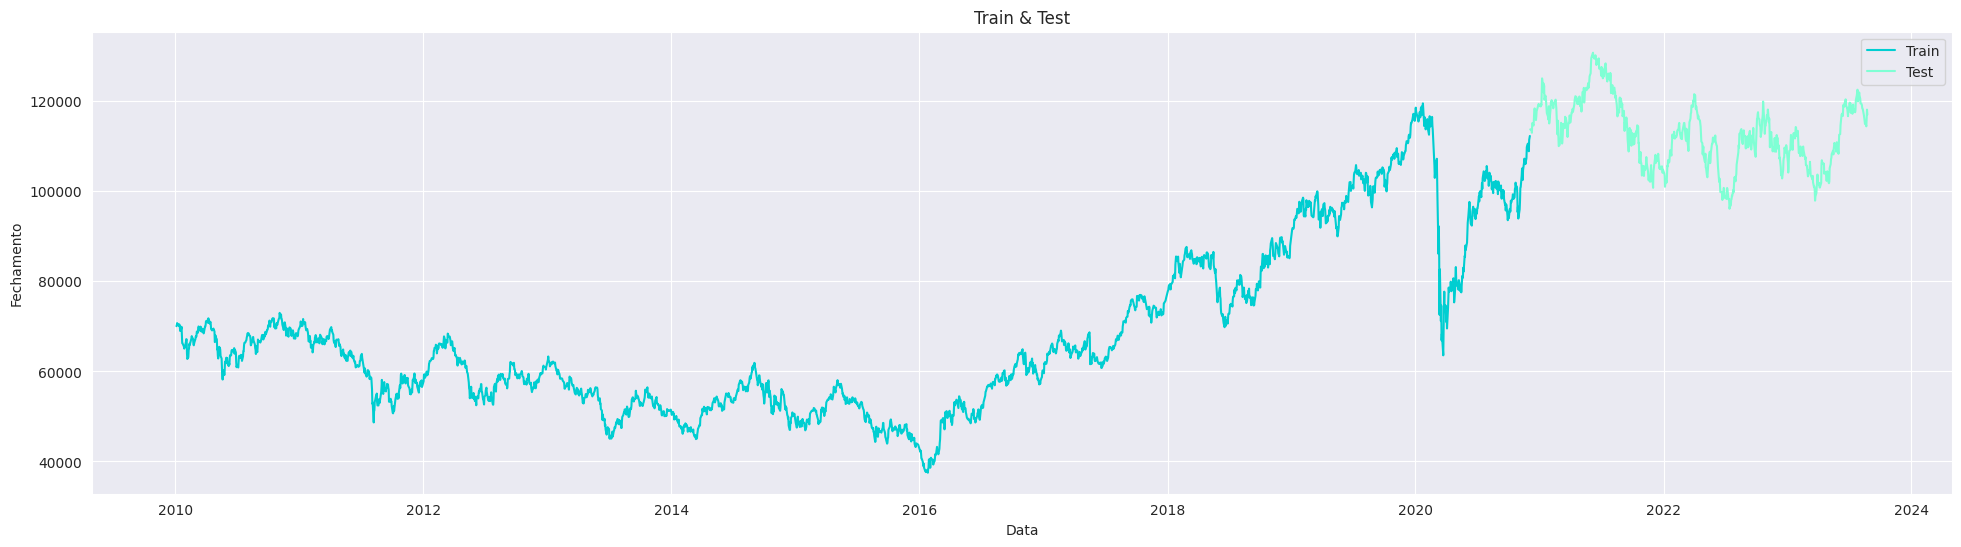

In [540]:
sns.set_style("dark")
plt.figure(figsize=(24,6))
plt.grid(True)
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Train & Test')
plt.plot(train["Último"], '#00CED1', label='Train')
plt.plot(test["Último"], '#7FFFD4', label='Test')
plt.legend()
plt.show()

In [541]:
#MODELO XGB

In [542]:
##Usamos o modelo XGBRegressor para previsão da Ibovespa devido ao seu bom desempenho, capacidade de lidar com dados ausentes, regularização, modelagem de não linearidades e flexibilidade na seleção de recursos e ajuste de hiperparâmetros. Além disso, é rápido no treinamento e pode lidar com séries temporais sazonais. No entanto, o sucesso da previsão depende de muitos fatores, incluindo a qualidade dos dados e a escolha cuidadosa dos parâmetros do modelo. É importante lembrar que a previsão de mercados financeiros é incerta, e resultados passados não garantem resultados futuros.

In [543]:
features = ["Abertura","Máxima","Mínima","Vol."]
target = 'Último'

In [544]:
import xgboost as xgb

In [545]:
xgbmodel =  xgb.XGBRegressor()
xgbmodel.fit(train[features], train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [546]:
predicao = xgbmodel.predict(test[features])

In [547]:
acuracia = xgbmodel.score(test[features], test[target])
acuracia

0.8631471277082519

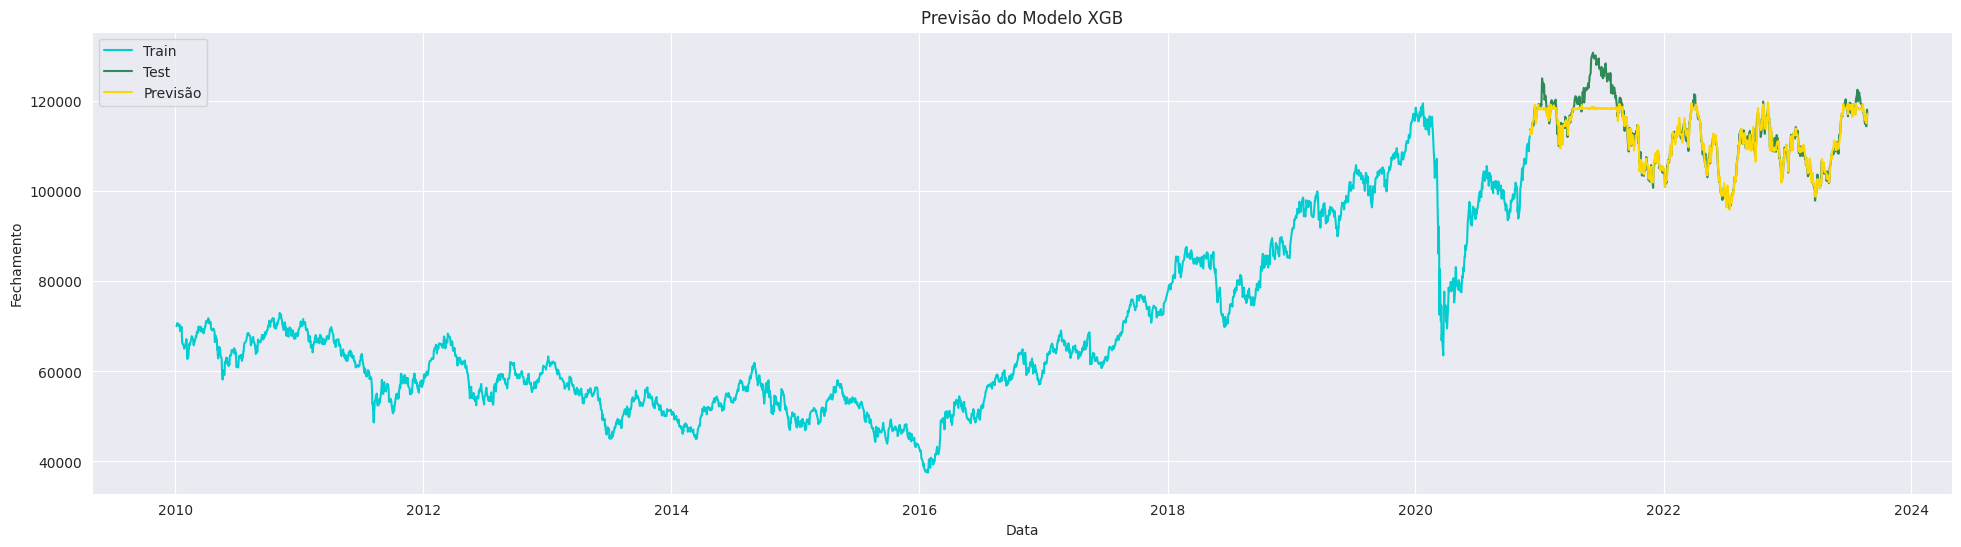

In [548]:
plt.figure(figsize=(24,6))
plt.plot(train['Último'], color='#00CED1', label='Train')
plt.plot(test['Último'], color = '#2E8B57', label='Test')
plt.plot(test[target].index, predicao, color = '#FFD700',label='Previsão')
plt.title('Previsão do Modelo XGB')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)
plt.show()

In [549]:
#Conclusão: Após a conclusão do Modelo XGB, conseguimos uma acuracia de 86%.

In [550]:
#ARIMA - (AR): Autoregressivo, I: Integrado, MA:Moving Average
# A(x,y,z) -> ACF, PACF

In [551]:
lag_acf = acf(df_diff.dropna(), nlags=20)
lag_pacf = pacf(df_diff.dropna(), nlags=20)

In [552]:
#5% ACF

# 1.96/sqrt(N-d) -> N - número de pojntos do df e d é o número de vezes que nós diferenciamos o df

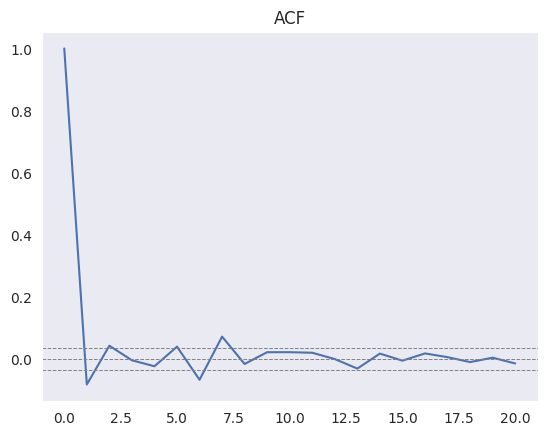

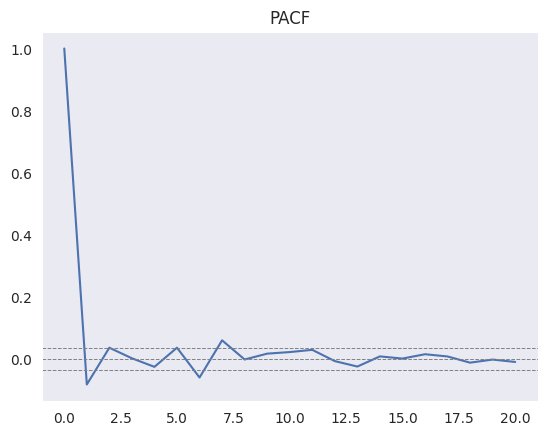

In [553]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

In [554]:
#A(x,y,z)

In [555]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

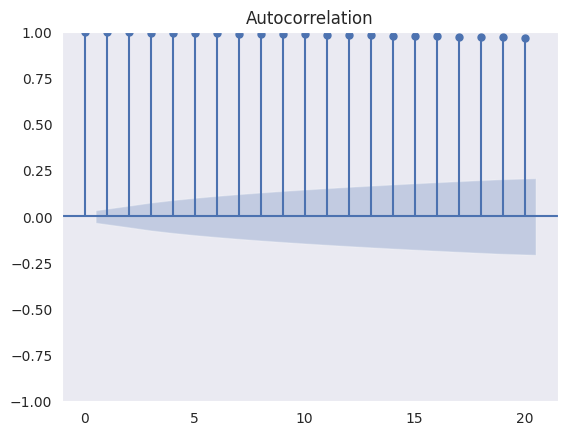

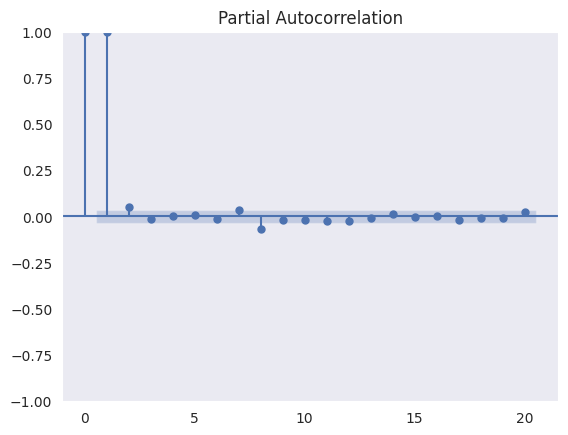

In [556]:
plot_acf(df_base, lags=20)
plot_pacf(df_base, lags=20)
plt.show()

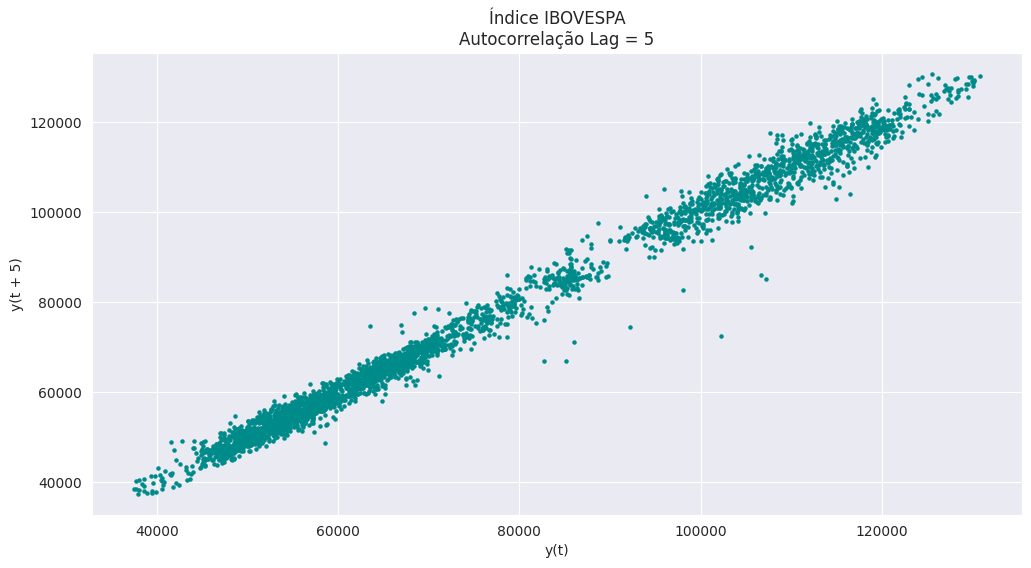

In [557]:
plt.figure(figsize=(12, 6))

lag_plot(df_base, lag=5, c='#008B8B', s= 5)
plt.grid()
plt.title('Índice IBOVESPA\nAutocorrelação Lag = 5')

plt.show()

In [558]:
!pip install statsforecast

In [559]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA, WindowAverage

In [560]:
dados = df.copy()

In [561]:
dados.reset_index(inplace=True)

In [562]:
dados.columns = ['ds', 'y', 'abertura', 'max', 'min', 'volume', 'variacao']
dados

,ds,y,abertura,max,min,volume,variacao
0,2010-01-04,70045,68587,70081,68587,1660000.0,0.0212
1,2010-01-05,70240,70046,70595,69928,1980000.0,0.0028
2,2010-01-06,70729,70237,70937,70016,2240000.0,0.0070
3,2010-01-07,70451,70723,70723,70045,1550000.0,-0.0039
4,2010-01-08,70263,70455,70766,70158,1630000.0,-0.0027
...,...,...,...,...,...,...,...
3376,2023-08-18,115409,114973,115729,114423,10600000.0,0.0037
3377,2023-08-21,114429,115404,115425,114067,9790000.0,-0.0085
3378,2023-08-22,116156,114433,116286,114433,9830000.0,0.0151
3379,2023-08-23,118135,116160,118135,116159,11540000.0,0.0170


In [563]:
dados_unique = dados[['ds','y']].copy()

In [564]:
dados_unique['unique_id'] = 'fechamento'
dados_unique

,ds,y,unique_id
0,2010-01-04,70045,fechamento
1,2010-01-05,70240,fechamento
2,2010-01-06,70729,fechamento
3,2010-01-07,70451,fechamento
4,2010-01-08,70263,fechamento
...,...,...,...
3376,2023-08-18,115409,fechamento
3377,2023-08-21,114429,fechamento
3378,2023-08-22,116156,fechamento
3379,2023-08-23,118135,fechamento


In [565]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [566]:
treino = dados_unique.iloc[:int(.80*len(df)), :]
valid = dados_unique.iloc[int(.80*len(df)):, :]

In [567]:
h = len(test)
h

677

In [568]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_df.dropna(inplace=True)
forecast_df.reset_index(drop=True)

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,fechamento,2020-12-04,112292.0,110456.226562,114127.773438,113750.0
1,fechamento,2020-12-07,112292.0,108620.460938,115963.539062,113590.0
2,fechamento,2020-12-08,112292.0,108187.093750,116396.906250,113793.0
3,fechamento,2020-12-09,112292.0,107795.296875,116788.703125,113001.0
4,fechamento,2020-12-10,112292.0,107435.007812,117148.992188,115129.0
...,...,...,...,...,...,...
455,fechamento,2022-10-05,112292.0,64738.808594,159845.187500,117198.0
456,fechamento,2022-10-06,112292.0,64703.386719,159880.609375,117561.0
457,fechamento,2022-10-07,112292.0,64667.992188,159916.015625,116375.0
458,fechamento,2022-10-10,112292.0,64561.964844,160022.031250,115941.0


In [569]:
wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

WMAPE: 5.60%


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:1514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unique_id"] = df["unique_id"].astype(uid_dtype)


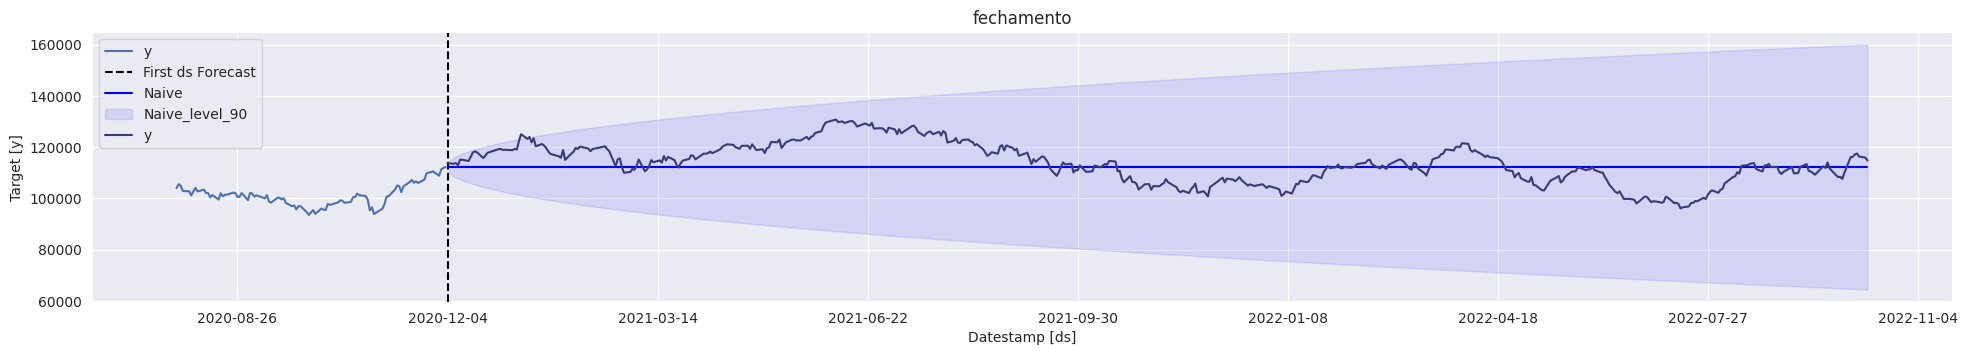

In [570]:
model.plot(treino, forecast_df, level=[90], max_insample_length=90)


WMAPE: 5.92%


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:1514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unique_id"] = df["unique_id"].astype(uid_dtype)


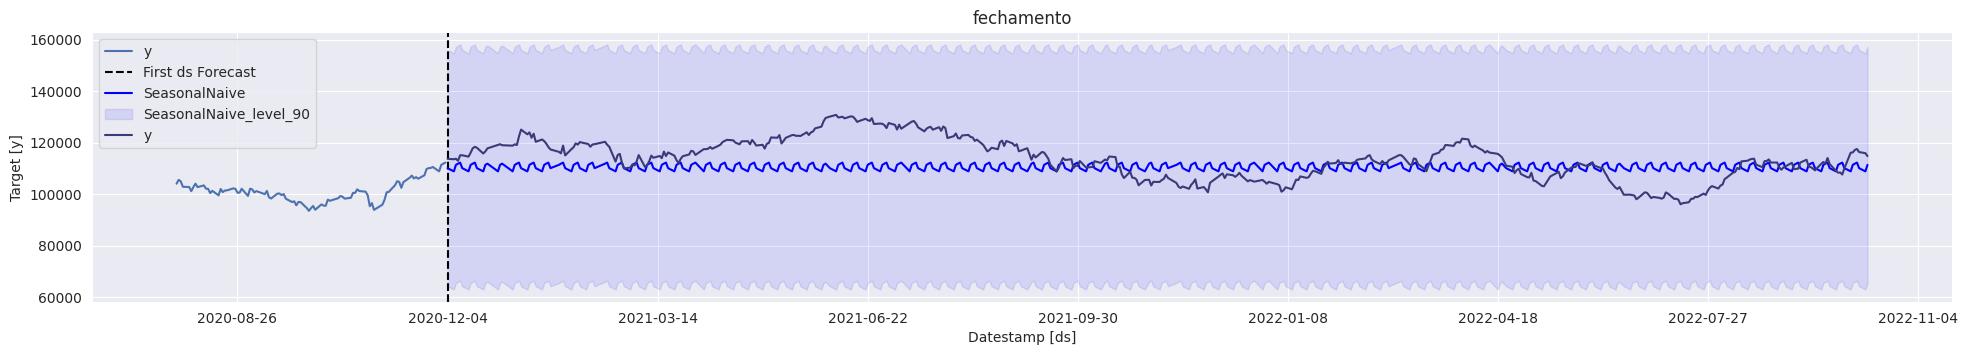

In [571]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')
forecast_dfs.dropna(inplace=True)
forecast_dfs.reset_index(drop=True)

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90],engine ='matplotlib', max_insample_length=90)

In [572]:
#Conclusão: Modelo Naive não se adapta a necessidade do projeto

In [573]:
#Modelo ARIMA

In [574]:
df_base = df_base.rename_axis('ds')


In [575]:
df_base = df_base.rename(columns={'Último': 'y'})
df_base

,y
ds,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0
...,...
2023-08-18,115409.0
2023-08-21,114429.0
2023-08-22,116156.0


In [595]:
train = df_base.loc[(df_base.index > '2010-01-04') & (df_base.index < '2021-01-01')]
test = df_base.loc[df_base.index >= '2021-01-01']

In [587]:
train

,y
ds,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0
...,...
2020-12-22,116636.0
2020-12-23,117807.0
2020-12-28,119124.0


In [577]:
len(train)

2721

In [588]:
test

,y
ds,
2021-01-04,118855.0
2021-01-05,119376.0
2021-01-06,119100.0
2021-01-07,122386.0
2021-01-08,125077.0
...,...
2023-08-18,115409.0
2023-08-21,114429.0
2023-08-22,116156.0


In [578]:
len(test)

660

In [585]:
arima_model = ARIMA(train, order=(5,1,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [586]:
arima_model_fit = arima_model.fit()


In [592]:
y_pred = arima_model_fit.forecast(len(train))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [593]:
residuals = pd.DataFrame(arima_model_fit.resid)


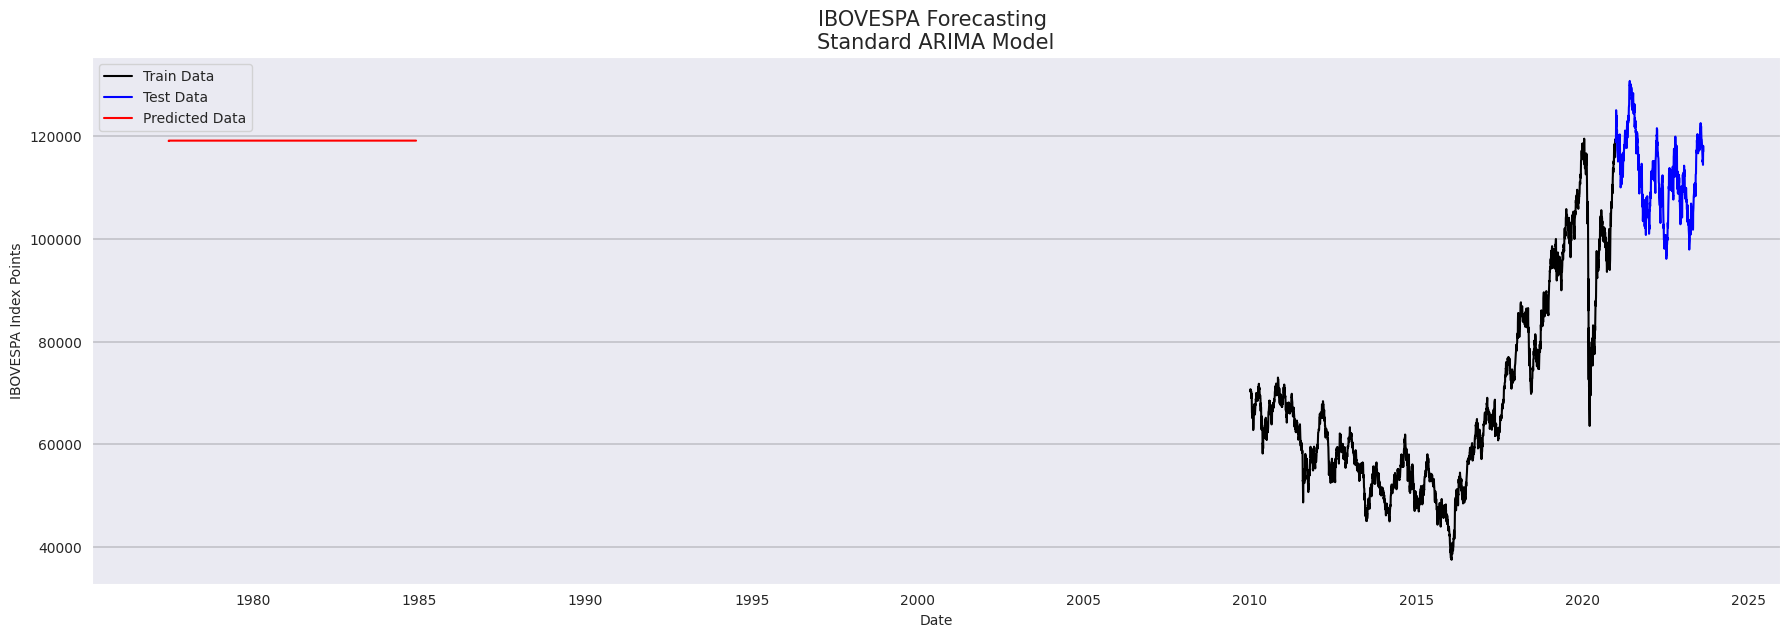

In [603]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.lineplot(data=train, x='ds', y='y', ax=ax, label='Train Data', color='black')
sns.lineplot(data=test, x='ds', y='y', ax=ax, color='blue', label='Test Data')
sns.lineplot(data=y_pred, ax=ax, color='red', label='Predicted Data')
plt.tight_layout()

ax.grid(True, color='black', linewidth=0.2, axis='y')

ax.set_title('IBOVESPA Forecasting \nStandard ARIMA Model', fontsize=15)
ax.set_xlabel('Date')
ax.set_ylabel('IBOVESPA Index Points')

plt.legend(loc='upper left')  # Adicione uma legenda
plt.show()

WMAPE: 5.57%


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:1514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unique_id"] = df["unique_id"].astype(uid_dtype)


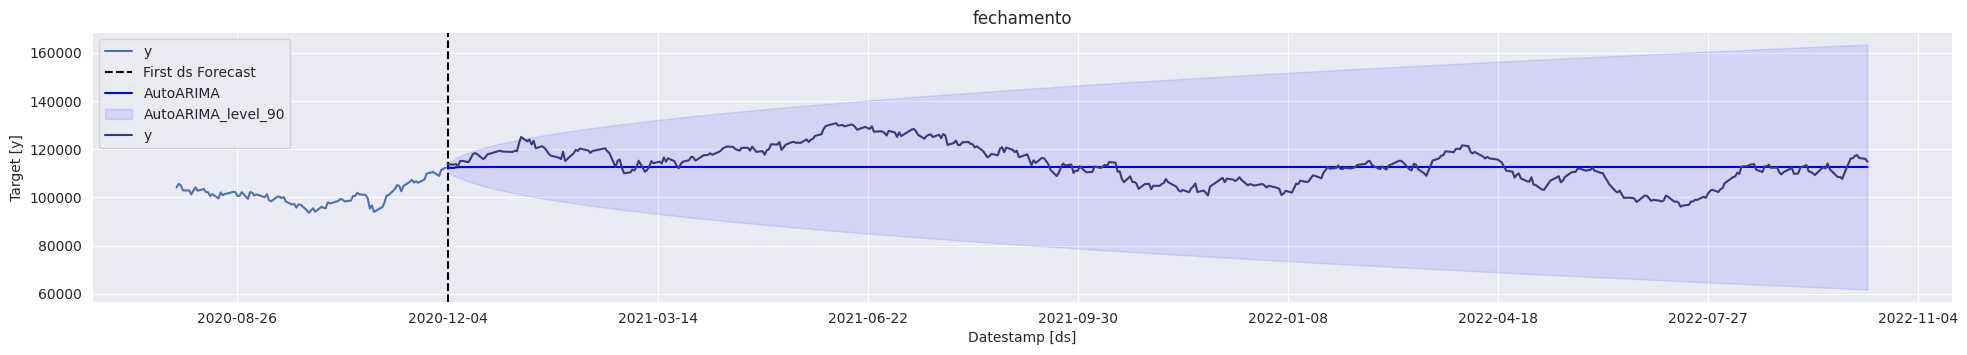

In [584]:
wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90],engine ='matplotlib', max_insample_length=90)